# Question 1: Exploring Trends in North America

Are there any trends in sentiment, aggression, or stance over time in North America? Are there any trends that coincide with current events? 

### Imports

In [127]:
#Import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import hvplot.pandas
from scipy.stats import linregress
import numpy as np
from scipy.optimize import curve_fit

In [128]:
# Import Data
path = os.path.join("..", "Resources", "NA_sample_020.csv")
df = pd.read_csv(path)
df.head()

Unnamed: 0                 created_at        lat        lng  sentiment  \
0     8037902  2018-01-31 20:40:44+00:00  40.441694 -79.990086  -0.120697   
1     8790126  2018-03-15 21:28:05+00:00  38.895110 -77.036370  -0.378573   
2    11647260  2018-09-29 14:42:56+00:00  44.000340 -72.749830  -0.216689   
3    11810796  2018-10-08 22:23:50+00:00  39.952330 -75.163790  -0.687731   
4    13183104  2018-12-16 11:52:40+00:00  45.421106 -75.690308   0.611834   

              topic    stance  gender  aggressiveness  
0          Politics  believer    male      aggressive  
1     Global stance  believer    male  not aggressive  
2          Politics  believer  female  not aggressive  
3     Global stance  believer  female  not aggressive  
4  Weather Extremes  believer    male  not aggressive

### Set Up DataFrame

In [129]:
# Create new df with column with month and date
dates = pd.to_datetime(df["created_at"], infer_datetime_format=True)
df_month = df.loc[:, ["created_at", "lat", "lng", "sentiment", "topic", "stance", "gender", "aggressiveness"]]
df_month["created_at"] = dates
df_month['date'] = df_month['created_at'].dt.to_period('M')

#Add a column for the year
df_month['year'] = df_month['created_at'].dt.year

df_month.head()

/Users/jennifershulyak/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


created_at        lat        lng  sentiment  \
0 2018-01-31 20:40:44+00:00  40.441694 -79.990086  -0.120697   
1 2018-03-15 21:28:05+00:00  38.895110 -77.036370  -0.378573   
2 2018-09-29 14:42:56+00:00  44.000340 -72.749830  -0.216689   
3 2018-10-08 22:23:50+00:00  39.952330 -75.163790  -0.687731   
4 2018-12-16 11:52:40+00:00  45.421106 -75.690308   0.611834   

              topic    stance  gender  aggressiveness     date  year  
0          Politics  believer    male      aggressive  2018-01  2018  
1     Global stance  believer    male  not aggressive  2018-03  2018  
2          Politics  believer  female  not aggressive  2018-09  2018  
3     Global stance  believer  female  not aggressive  2018-10  2018  
4  Weather Extremes  believer    male  not aggressive  2018-12  2018

## Looking at Stance, Aggression, and Sentiment Over Time

In [130]:
# Create new column for agressiveness factor
df_month["aggressiveness_factor"] = " "
df_month["stance_factor"] = " "

#Loop through df and change the ag factor to 0 1 depending on the agressiveness
for index, row in df_month.iterrows():
    if row["aggressiveness"] == "aggressive":
        df_month.loc[index, "aggressiveness_factor"] = 100.0
    else:
        df_month.loc[index, "aggressiveness_factor"] = 0.0 

    if row["stance"] == "believer":
        df_month.loc[index, "stance_factor"] = 100.0
    else:
        df_month.loc[index, "stance_factor"] = 0.0

df_month.head()

created_at        lat        lng  sentiment  \
0 2018-01-31 20:40:44+00:00  40.441694 -79.990086  -0.120697   
1 2018-03-15 21:28:05+00:00  38.895110 -77.036370  -0.378573   
2 2018-09-29 14:42:56+00:00  44.000340 -72.749830  -0.216689   
3 2018-10-08 22:23:50+00:00  39.952330 -75.163790  -0.687731   
4 2018-12-16 11:52:40+00:00  45.421106 -75.690308   0.611834   

              topic    stance  gender  aggressiveness     date  year  \
0          Politics  believer    male      aggressive  2018-01  2018   
1     Global stance  believer    male  not aggressive  2018-03  2018   
2          Politics  believer  female  not aggressive  2018-09  2018   
3     Global stance  believer  female  not aggressive  2018-10  2018   
4  Weather Extremes  believer    male  not aggressive  2018-12  2018   

  aggressiveness_factor stance_factor  
0                 100.0         100.0  
1                   0.0         100.0  
2                   0.0         100.0  
3                   0.0         100.0  
4                   0.0         100.0

In [131]:
# Change the type for the factors to be floats
df_month = df_month.astype({
    "aggressiveness_factor": "float64",
    "stance_factor": "float64"
})

# Take the Average Sentiment, aggressiveness, and stance for each month using Groupby
df_averages = df_month.groupby("date")[["aggressiveness_factor", "stance_factor", "sentiment"]].mean() 
# The aggressiveness and stance factors give the percentages of people who are aggressive or believe in climate change

### Plot Sentiment, Aggressiveness, and Stance Over Time

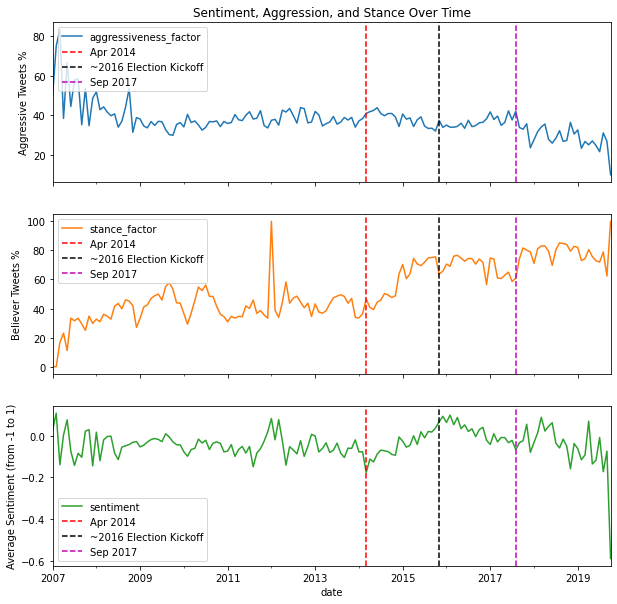

In [132]:
#Plot 
axes = df_averages.plot(subplots=True, figsize=(10, 10))

axes[0].set_ylabel("Aggressive Tweets %")
axes[0].axvline(pd.to_datetime("2014-03-01"), color='r', linestyle='--', label = "Apr 2014")
axes[0].axvline(pd.to_datetime("2015-11-01"), color='k', linestyle='--', label = "~2016 Election Kickoff")
axes[0].axvline(pd.to_datetime("2017-08-01"), color='m', linestyle='--', label = "Sep 2017")
axes[0].legend(loc = "upper left")


axes[1].set_ylabel("Believer Tweets %")
axes[1].axvline(pd.to_datetime("2014-03-01"), color='r', linestyle='--', label = "Apr 2014")
axes[1].axvline(pd.to_datetime("2015-11-01"), color='k', linestyle='--', label = "~2016 Election Kickoff")
axes[1].axvline(pd.to_datetime("2017-08-01"), color='m', linestyle='--', label = "Sep 2017")
axes[1].legend(loc = "upper left")

axes[2].set_ylabel("Average Sentiment (from -1 to 1)")
axes[2].axvline(pd.to_datetime("2014-03-01"), color='r', linestyle='--', label = "Apr 2014")
axes[2].axvline(pd.to_datetime("2015-11-01"), color='k', linestyle='--', label = "~2016 Election Kickoff")
axes[2].axvline(pd.to_datetime("2017-08-01"), color='m', linestyle='--', label = "Sep 2017")
axes[2].legend(loc = "best")

axes[0].set_title("Sentiment, Aggression, and Stance Over Time")

# Save plot
plt.savefig("../Images/Q1_Trends.png")


## Analysis

blah

## Comparing the Number of Tweets that Support, are Neutral on, or Deny Climate Change

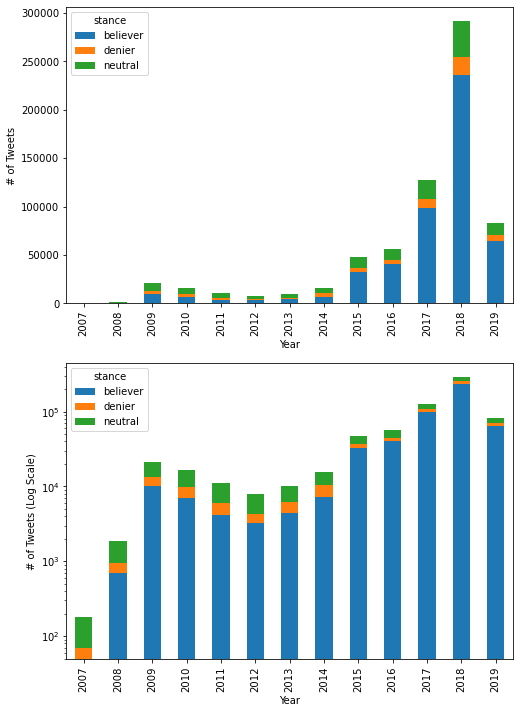

In [133]:
stance_df = df_month.groupby(["year", "stance"])["gender"].count()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

stance_df.unstack().plot(kind='bar', stacked=True, ax=axes[0])
stance_df.unstack().plot(kind = "bar", stacked = True, ax=axes[1], logy= True)

axes[0].set_xlabel("Year")
axes[0].set_ylabel("# of Tweets")

axes[1].set_xlabel("Year")
axes[1].set_ylabel("# of Tweets (Log Scale)")


# Save plot
plt.savefig("../Images/Q1_StanceNumbers.png")


### Analysis:

blah

## Taking a Closer Look at Stance Over Time

### Exponential Regression for Believers

In [134]:
# Make a data frame with just stance
series_stance = df_averages["stance_factor"]
df_stance = series_stance.to_frame()    # Convert the series back into a dataframe
df_stance.reset_index(inplace=True) # Reset the index so that Date is a column
df_stance["date"] = df_stance["date"].astype("datetime64")  # Convert the dates into date time format

In [135]:
# Just look at the time after 2012 and before 2019
# Make a new dataframe looking at just after 2012 and cutting off the outlier of October 2019
df_2012 = df_stance.loc[(df_stance["date"] >= (pd.to_datetime("2012-02-01"))) & (df_stance["date"] <= (pd.to_datetime("2019-09-01"))), :]

In [136]:
x_values = [x for x in range(len(df_2012))] #list(df_stance["date"])
y = list(df_2012["stance_factor"])
y_values = [y for y in y]
len(y_values)

92

In [137]:
def func_exp(x, a, b, c):
        return a * np.exp(b * x) + c


x_data = np.array(x_values) 
y_data = np.array(y_values)

popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (-1, 0.01, 1))

expo_eq = "y = " + str(round(popt[0],2)) + "("+ str(round(popt[1],5)) + ")^x + " + str(round(popt[2],2))  


### Exponential Regression for Deniers

In [138]:
# Create new column for agressiveness factor
df_deniers = df_month.copy()
df_deniers["denier_factor"] = " "

#Loop through df and change the ag factor to 0 1 depending on the agressiveness
for index, row in df_deniers.iterrows():
    if row["stance"] == "denier":
        df_deniers.loc[index, "denier_factor"] = 100.0
    else:
        df_deniers.loc[index, "denier_factor"] = 0.0

df_deniers.head()

created_at        lat        lng  sentiment  \
0 2018-01-31 20:40:44+00:00  40.441694 -79.990086  -0.120697   
1 2018-03-15 21:28:05+00:00  38.895110 -77.036370  -0.378573   
2 2018-09-29 14:42:56+00:00  44.000340 -72.749830  -0.216689   
3 2018-10-08 22:23:50+00:00  39.952330 -75.163790  -0.687731   
4 2018-12-16 11:52:40+00:00  45.421106 -75.690308   0.611834   

              topic    stance  gender  aggressiveness     date  year  \
0          Politics  believer    male      aggressive  2018-01  2018   
1     Global stance  believer    male  not aggressive  2018-03  2018   
2          Politics  believer  female  not aggressive  2018-09  2018   
3     Global stance  believer  female  not aggressive  2018-10  2018   
4  Weather Extremes  believer    male  not aggressive  2018-12  2018   

   aggressiveness_factor  stance_factor denier_factor  
0                  100.0          100.0           0.0  
1                    0.0          100.0           0.0  
2                    0.0          100.0           0.0  
3                    0.0          100.0           0.0  
4                    0.0          100.0           0.0

In [139]:
df_avdeniers = df_deniers.groupby("date")["denier_factor"].mean() 

df_den = df_avdeniers.to_frame()
df_den.reset_index(inplace=True)
df_den["date"] = df_den["date"].astype("datetime64")

# Make a new dataframe looking at just after 2012 and cutting off the outlier of October 2019
df_2012_den = df_den.loc[(df_den["date"] >= (pd.to_datetime("2012-02-01"))) & (df_den["date"] <= (pd.to_datetime("2019-09-01"))), :]

In [140]:
x_values_2 = [x for x in range(len(df_2012_den))] #list(df_stance["date"])
y_2 = list(df_2012_den["denier_factor"])
y_values_2 = [y for y in y_2]

In [141]:
def func_exp(x, a, b, c):
        return a * np.exp(b * x) + c

x_data_2 = np.array(x_values_2) 
y_data_2 = np.array(y_values_2)

popt_2, pcov_2 = curve_fit(func_exp, x_data_2, y_data_2, p0 = (-1, 0.001, 1))

expo_eq_2 = "y = " + str(round(popt_2[0],2)) + "("+ str(round(popt_2[1],5)) + ")^x + " + str(round(popt_2[2],2))  
expo_eq_2

'y = 25.62(-0.00563)^x + -8.41'

### Plot Both Regressions Together

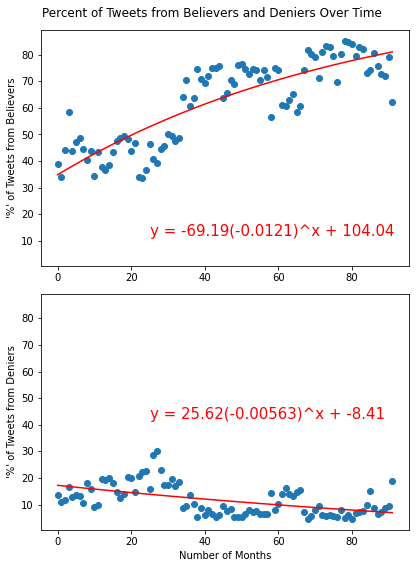

In [142]:
#
regression_stance, axs = plt.subplots(2, 1, figsize=(6, 8), sharey=True)

axs[0].scatter(x_data, y_data)
axs[0].plot(x_data, func_exp(x_data, *popt), color = "red")
axs[0].annotate(expo_eq,(25, 12),fontsize=15,color="red") # Graphing the linear equation on the plot 
axs[0].set_ylabel("'%' of Tweets from Believers")

axs[1].scatter(x_data_2, y_data_2)
axs[1].plot(x_data_2, func_exp(x_data_2, *popt_2), color = "red")
axs[1].set_ylabel("'%' of Tweets from Deniers")
axs[1].set_xlabel("Number of Months")
axs[1].annotate(expo_eq_2,(25,42),fontsize=15,color="red") # Graphing the linear equation on the plot 



regression_stance.suptitle('Percent of Tweets from Believers and Deniers Over Time')
regression_stance.tight_layout()

# Save plot
plt.savefig("../Images/Q1_Stance_Regression.png")

## Analysis:

blah